In [12]:
import pandas as pd
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx
import os 
import seaborn as sns 
from datetime import datetime

import umap.umap_ as umap
#import hdbscan
from sklearn.model_selection import train_test_split
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from keras.layers import Dense, Input
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from scipy.optimize import linear_sum_assignment

In [2]:
data_all = pd.read_csv('Dataset_user_article_NEW.csv')

In [ ]:
data_all.header()
#User_IP	Access_date	Topic	Escenic_ID	Date_only	publishDate	userNeeds_clean

In [35]:
data_all['userNeeds_clean'].unique()

array(['UPDATE', 'ANALYSIS', 'EDUCATE', 'TREND', 'INSPIRE', 'DIVERT'],
      dtype=object)

In [6]:
data_all.isnull().sum()

User_IP                0
Access_date            0
Topic                  0
Escenic_ID             0
Date_only              0
publishDate            0
userNeeds_clean    12577
dtype: int64

In [3]:
data_all = data_all[data_all['Topic'] != 'other']

In [4]:
data_all.dropna(inplace=True)
data_all.shape

(7403637, 7)

In [5]:
data_all.reset_index(inplace=True,drop=True)

In [ ]:
data_all = data_all.drop_duplicates(subset=['User_IP','Escenic_ID'],keep='first')
data_all = data_all.reset_index( drop=True)

In [7]:
data_all['Combination'] = data_all['Topic'] + ' ' + data_all['userNeeds_clean']

In [46]:
data_all['Combination'].unique() #36

array(['culture UPDATE', 'sciences-tech UPDATE', 'economie ANALYSIS',
       'economie EDUCATE', 'monde TREND', 'sciences-tech ANALYSIS',
       'suisse UPDATE', 'sport UPDATE', 'culture ANALYSIS',
       'monde UPDATE', 'culture INSPIRE', 'sciences-tech TREND',
       'culture EDUCATE', 'suisse TREND', 'suisse ANALYSIS',
       'monde ANALYSIS', 'culture DIVERT', 'economie UPDATE',
       'culture TREND', 'monde EDUCATE', 'sciences-tech INSPIRE',
       'monde INSPIRE', 'suisse INSPIRE', 'sciences-tech EDUCATE',
       'economie INSPIRE', 'sport INSPIRE', 'suisse EDUCATE',
       'economie TREND', 'suisse DIVERT', 'sport ANALYSIS',
       'sport DIVERT', 'sport EDUCATE', 'environnement EDUCATE',
       'sport TREND', 'monde DIVERT', 'sciences-tech DIVERT'],
      dtype=object)

In [47]:
df_comb = pd.DataFrame({'Count' : data_all.groupby('Combination').size()}).reset_index()

Text(0.5, 1.0, 'Distribution of combinations (Topic,Userneed)')

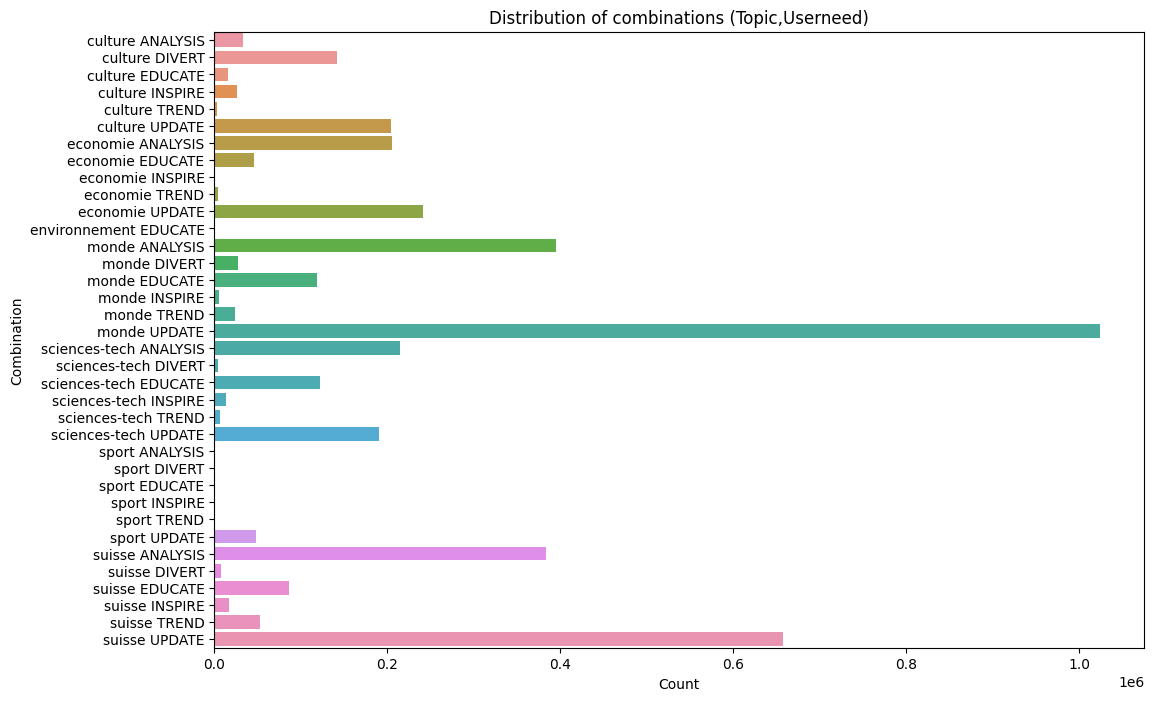

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_comb, y='Combination', x='Count')
plt.title('Distribution of combinations (Topic,Userneed)')

In [13]:
data_all.to_csv('Cleaned_data_x_clustering.csv')

In [54]:
data_all['User_IP'].unique().size

1272152